In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
from IPython.display import Image
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

import utils
from utils import Camera

# Calibration

In [2]:
left_path = './Inputs/left.jpg'
right_path = './Inputs/right.jpg'

## Collecting the points from the picture

In [3]:
### this cell can be skipped as output is already provided

#utils.indicate_points(left_path, 'outputs/points_left.txt')
#utils.indicate_points(right_path, 'outputs/points_right.txt')

In [4]:
left_points = utils.load_points('./Outputs/points_left.txt')
right_points = utils.load_points('./Outputs/points_right.txt')

In [5]:
obj_points = utils.load_points('./Inputs/calibration_points3.txt')

## Calibrate both cameras

In [6]:
left_image = Camera(left_path, left_points, obj_points)
right_image = Camera(right_path, right_points, obj_points)

cv.imwrite('./Outputs/with_axs_left.jpg', utils.draw_axes(left_image.img, left_image.M_ka, 200))
cv.imwrite('./Outputs/with_axs_right.jpg', utils.draw_axes(right_image.img, right_image.M_ka, 200))


True

## Results

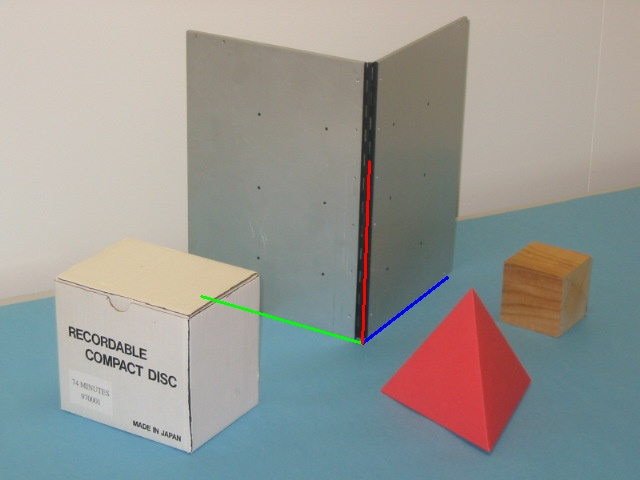

In [7]:
Image(filename='./Outputs/with_axs_left.jpg') 

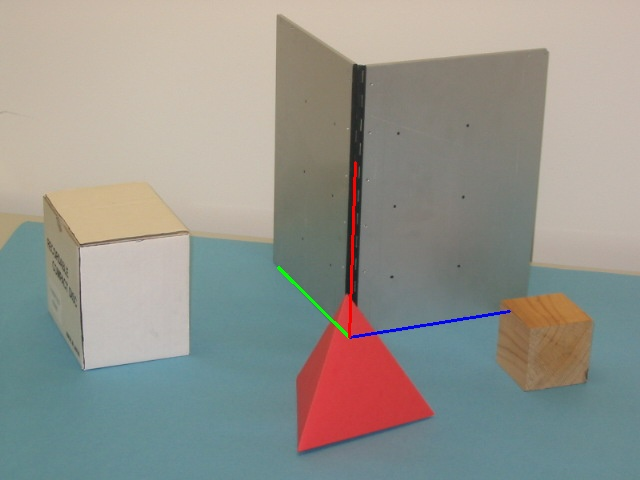

In [8]:
Image(filename='./Outputs/with_axs_right.jpg') 

# Reconstruct the 3D world

In [9]:
left_path = './Inputs/correspondence_left.jpg'
right_path = './Inputs/correspondence_right.jpg'

## Gather points

In [10]:
### this cell can be skipped as output is already provided

#utils.indicate_points(left_path, 'outputs/all_points_left.txt')
#utils.indicate_points(right_path, 'outputs/all_points_right.txt')

In [11]:
left_points = utils.load_points('./Outputs/all_points_left.txt')
right_points = utils.load_points('./Outputs/all_points_right.txt')
obj_points = utils.load_points('./Inputs/calibration_points3.txt')

## Create Image Objects

In [12]:
left_image = Camera(left_path, left_points, obj_points)
right_image = Camera(right_path, right_points, obj_points)

## Calculate 3D homogeneous coordinates and their mean squared error

In [13]:
estimated_points = utils.homogeneous_coordinates(left_image, right_image)
print('Mean squared error:', ((obj_points - estimated_points[:12, :])**2).mean())

Mean squared error: 5.437532627649816


In [14]:
with open('./outputs/estimated_points3D.txt', 'w') as f:
    for i in range(estimated_points.shape[0]):
        line = list(map(int, estimated_points[i, :]))
        f.write(str(line).replace(',', ' ').strip('[]')+'\n')

## Results

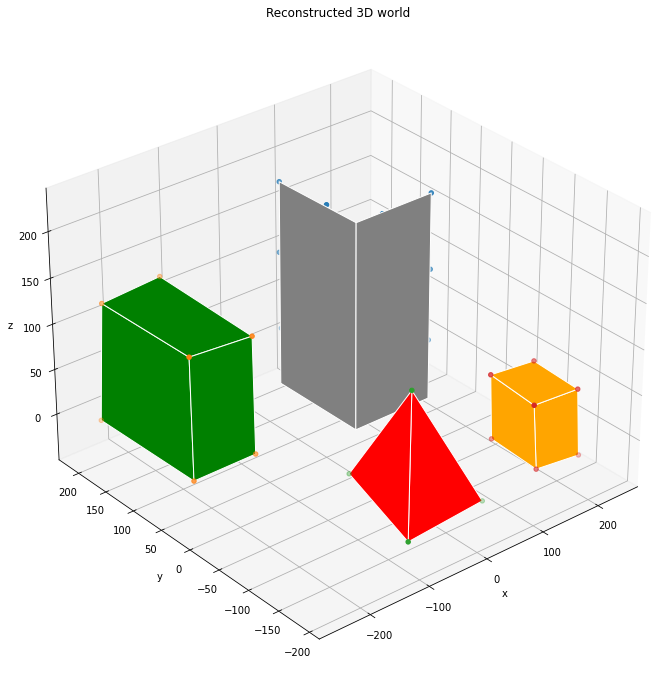

In [15]:
scene_points = utils.load_points('./Outputs/estimated_points3D.txt')

fig = plt.figure(figsize=(15, 12))
ax = fig.add_subplot(111, projection = '3d')

greyobj = scene_points[:12]
new_points = np.vstack(([0, 0, 0], [0, 0, 225]))
new_points = np.vstack((new_points, np.vstack(([129, 0, 0], [0, 130, 0]))))
greyobj = np.vstack((greyobj, new_points))

greenobj = scene_points[12:19]
redobj = scene_points[19:23]
yellowobj = scene_points[23:]

greyobj_vertices = [[greyobj[14], greyobj[5], greyobj[13], greyobj[12]],
                    [greyobj[15], greyobj[10],  greyobj[13],greyobj[12]],]
ax.add_collection3d(Poly3DCollection(greyobj_vertices, facecolors = 'grey', edgecolors = 'white'))

greenobj_vertices = [[greenobj[0], greenobj[1], greenobj[2], greenobj[3]],
                    [greenobj[0], greenobj[3], greenobj[5], greenobj[4]],
                    [greenobj[3], greenobj[2], greenobj[6], greenobj[5]],]
ax.add_collection3d(Poly3DCollection(greenobj_vertices, facecolors = 'green', edgecolors = 'white'))

redobj_vertices = [[redobj[0], redobj[3], redobj[1]],
                    [redobj[2], redobj[3], redobj[1]],]
ax.add_collection3d(Poly3DCollection(redobj_vertices, facecolors = 'red', edgecolors = 'w'))

yellowobj_vertices = [[yellowobj[0], yellowobj[1], yellowobj[2], yellowobj[3]],
                    [yellowobj[0], yellowobj[3], yellowobj[5], yellowobj[4]],
                    [yellowobj[3], yellowobj[2], yellowobj[6], yellowobj[5]],]
ax.add_collection3d(Poly3DCollection(yellowobj_vertices,facecolors = 'orange', edgecolors = 'w'))

ax.scatter3D(greyobj[:12 , 0], greyobj[:12 , 1], greyobj[:12 , 2])
ax.scatter3D(greenobj[:, 0], greenobj[:, 1], greenobj[:, 2])
ax.scatter3D(redobj[:, 0], redobj[:, 1], redobj[:, 2])
ax.scatter3D(yellowobj[:, 0], yellowobj[:, 1], yellowobj[:, 2])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.azim = -130

plt.title("Reconstructed 3D world")
plt.show()
fig.savefig('Outputs/3Dprojection.jpg')